### Importing Libraries

In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import backward_elimination, forward_selection,stepwise_selection
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary, exhaustive_search
from dmba import liftChart, gainsChart
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn import metrics

### Importing Dataset

In [2]:
## Import Dataset

house_df = pd.read_csv('HousingDataSet.csv')
house_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Wrangling

In [6]:
#Dropping unwanted columns

new_df = house_df.drop(['id','date','zipcode','lat','long'],axis=1)

In [7]:
# replacing outlier

new_df['bedrooms'].replace(33,3,inplace =True)

In [8]:
new_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.369454,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.907964,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [9]:
clean_df = new_df

In [10]:
# Creating a new column with houses that were renovated and dropping the existing column

clean_df['is_renovated'] = np.where(clean_df['yr_renovated'] > 0, 1, 0)


clean_df.drop('yr_renovated',axis =1,inplace = True)

In [11]:
clean_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,0


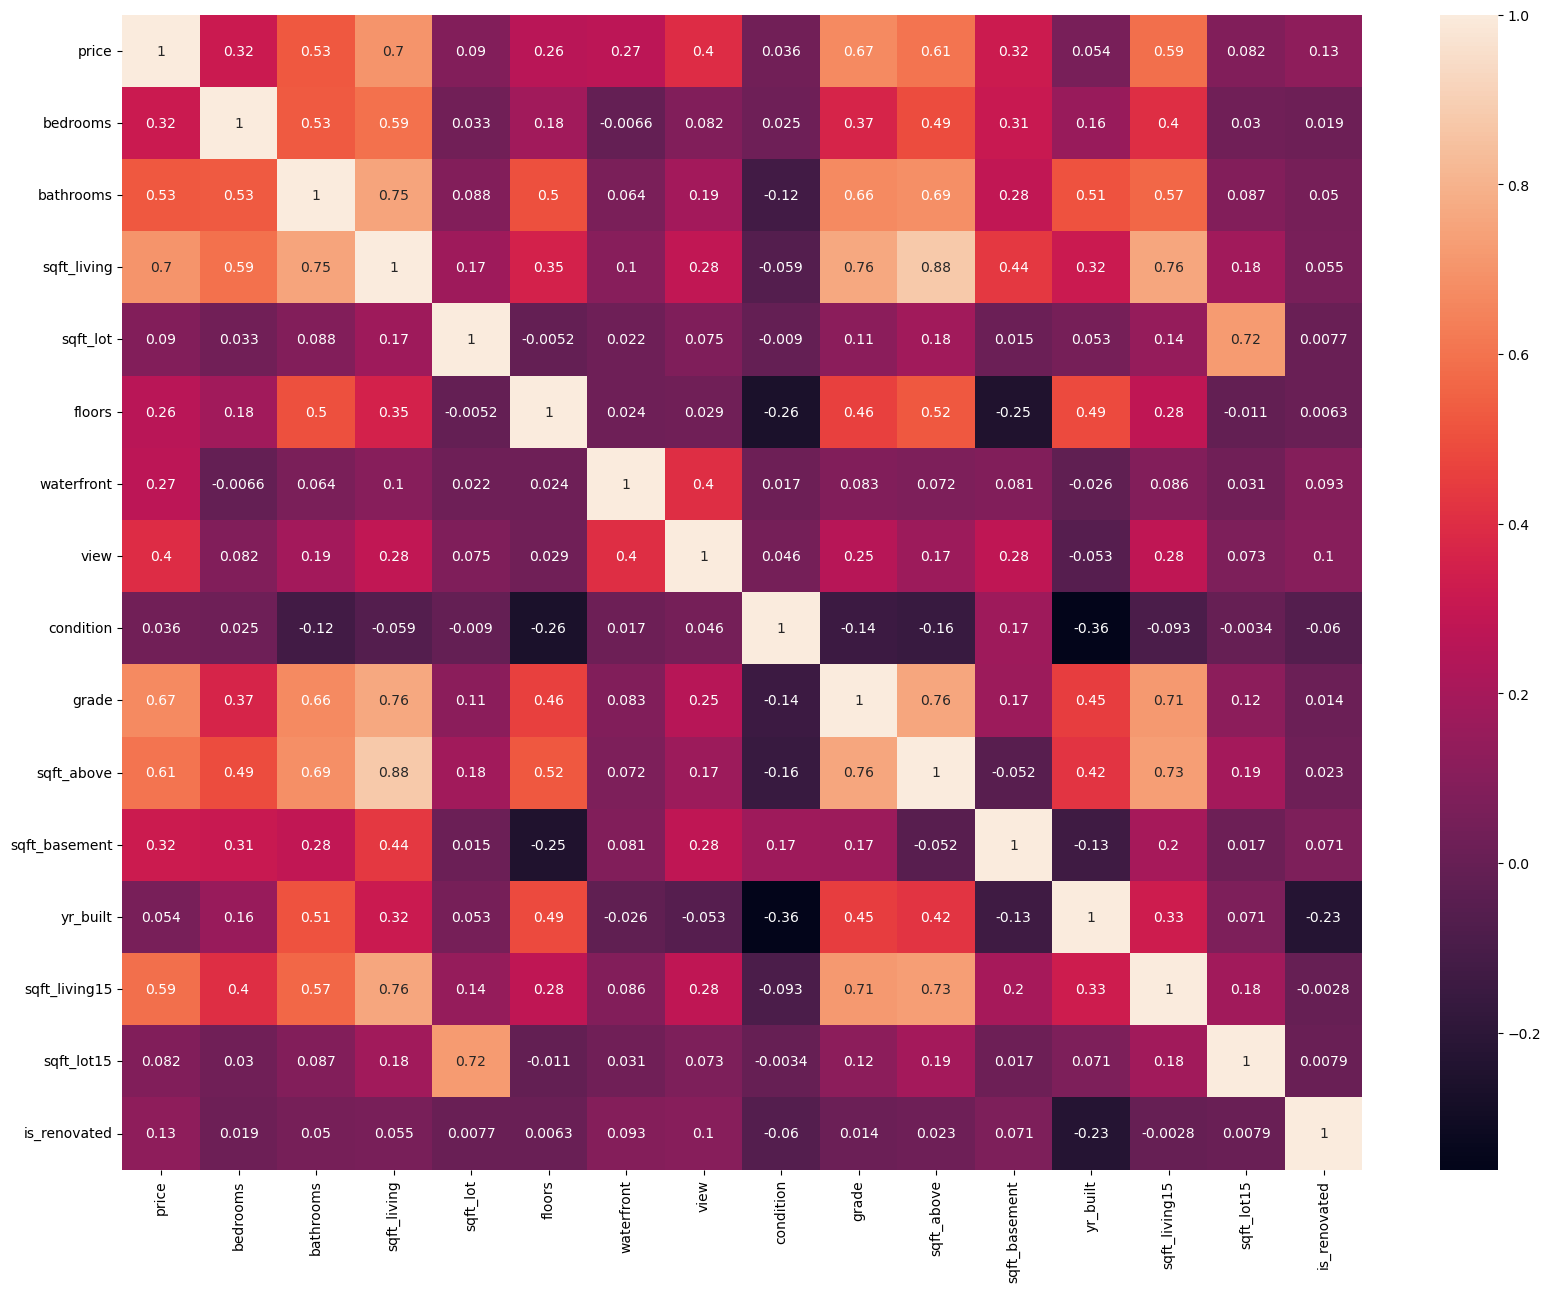

In [12]:
cormap = clean_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cormap, annot=True)
plt.show()

In [13]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  is_renovated   21613 non-null  int32  
dtypes: float64(3), int32(1), int64(12)
memory usage: 2.6 MB


### Removing columns with low correlations

In [14]:
# Eliminating columns with low correlation

# X = clean_df[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_living15']]
X = clean_df[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15','is_renovated']]
y = clean_df['price']

# Search Algorithm

Shmueli, G., Bruce, P. C., Gedeck, P., &amp; Patel, N. R. (2020). Data mining for Business Analytics: Concepts, techniques and applications in Python. John Wiley & Sons, Inc. 

In [15]:
# Split the data into training and validation
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=42)

In [16]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

In [17]:
def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

In [18]:
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)
data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC':AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
    pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

In [19]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

In [20]:
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

In [21]:
allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model,
                                                  score_model, verbose=True)

Variables: bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, sqft_living15, sqft_lot15, is_renovated
Start: score=355731.85
Step: score=355729.85, remove sqft_living
Step: score=355728.31, remove floors
Step: score=355728.31, remove None


In [22]:
print(best_variables)
regressionSummary(test_y, best_model.predict(test_X[best_variables]))

['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'is_renovated']

Regression statistics

                      Mean Error (ME) : 2872.5344
       Root Mean Squared Error (RMSE) : 241751.0270
            Mean Absolute Error (MAE) : 151751.6384
          Mean Percentage Error (MPE) : -9.3809
Mean Absolute Percentage Error (MAPE) : 31.1484


In [23]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

In [24]:
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

In [25]:
best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, sqft_living15, sqft_lot15, is_renovated
Start: score=368124.57, constant
Step: score=359374.06, add sqft_living
Step: score=358140.16, add grade
Step: score=357006.81, add view
Step: score=356580.98, add waterfront
Step: score=356292.35, add condition
Step: score=356046.95, add is_renovated
Step: score=355890.25, add bedrooms
Step: score=355793.79, add sqft_lot15
Step: score=355755.80, add sqft_above
Step: score=355737.49, add sqft_living15
Step: score=355728.31, add bathrooms
Step: score=355728.31, add None
['sqft_living', 'grade', 'view', 'waterfront', 'condition', 'is_renovated', 'bedrooms', 'sqft_lot15', 'sqft_above', 'sqft_living15', 'bathrooms']


In [26]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model,verbose=True)
print(best_variables)

Variables: bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, sqft_living15, sqft_lot15, is_renovated
Start: score=368124.57, constant
Step: score=359374.06, add sqft_living
Step: score=358140.16, add grade
Step: score=357006.81, add view
Step: score=356580.98, add waterfront
Step: score=356292.35, add condition
Step: score=356046.95, add is_renovated
Step: score=355890.25, add bedrooms
Step: score=355793.79, add sqft_lot15
Step: score=355755.80, add sqft_above
Step: score=355737.49, add sqft_living15
Step: score=355728.31, add bathrooms
Step: score=355728.31, unchanged None
['sqft_living', 'grade', 'view', 'waterfront', 'condition', 'is_renovated', 'bedrooms', 'sqft_lot15', 'sqft_above', 'sqft_living15', 'bathrooms']


### Considering the algorthim results keeping only the suggested columns in forwards selection method

In [27]:
X = clean_df[['sqft_living', 'grade', 'view', 'waterfront', 'condition', 'is_renovated', 'bedrooms', 'sqft_lot15', 'sqft_above', 'sqft_living15', 'bathrooms']]
y = clean_df['price']

In [28]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=42)

In [29]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [30]:
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

        Predictor    coefficient
0     sqft_living     206.605994
1           grade  103193.904423
2            view   56309.834056
3      waterfront  515660.092078
4       condition   54205.970748
5    is_renovated  153779.693882
6        bedrooms  -35769.121509
7      sqft_lot15      -0.742739
8      sqft_above     -36.610041
9   sqft_living15      19.726378
10      bathrooms  -13490.921070


In [31]:
lm_pred = lm.predict(test_X)
result = pd.DataFrame({'Predicted': lm_pred, 'Actual': test_y, 'Difference': test_y - lm_pred})
print(result.head(20))

          Predicted     Actual     Difference
735    5.577636e+05   365000.0 -192763.632644
2830   7.470096e+05   865000.0  117990.390639
4106   1.235944e+06  1038000.0 -197943.916013
16218  1.499047e+06  1490000.0   -9047.015439
19964  7.206953e+05   711000.0   -9695.318601
1227   3.294954e+05   211000.0 -118495.376728
18849  7.632866e+05   790000.0   26713.350967
19369  5.049273e+05   680000.0  175072.658376
20164  4.421770e+05   384500.0  -57676.968821
7139   3.356049e+05   605000.0  269395.127272
2174   5.614780e+05   638000.0   76522.000701
13342  5.841672e+05   385000.0 -199167.213395
15468  3.610636e+05   175000.0 -186063.557170
7662   4.169386e+05   365000.0  -51938.566633
16941  2.234826e+05   160000.0  -63482.603753
5304   1.166119e+06  1070000.0  -96119.308801
6377   2.363076e+05   800000.0  563692.379708
12319  1.083215e+06   795127.0 -288088.080142
18835  2.860295e+05   355000.0   68970.522520
5337   5.399390e+05   474000.0  -65938.988777


In [32]:
regressionSummary(test_y, lm.predict(test_X))


Regression statistics

                      Mean Error (ME) : 2872.5344
       Root Mean Squared Error (RMSE) : 241751.0270
            Mean Absolute Error (MAE) : 151751.6384
          Mean Percentage Error (MPE) : -9.3809
Mean Absolute Percentage Error (MAPE) : 31.1484


# KNN

## KNN = 5 

In [33]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_X,train_y)
knn_predictions = knn.predict(test_X)

In [34]:
result_knnfive = pd.DataFrame({'Predicted': knn_predictions, 'Actual': test_y, 'Difference': test_y - knn_predictions})
print(result.head(20))

          Predicted     Actual     Difference
735    5.577636e+05   365000.0 -192763.632644
2830   7.470096e+05   865000.0  117990.390639
4106   1.235944e+06  1038000.0 -197943.916013
16218  1.499047e+06  1490000.0   -9047.015439
19964  7.206953e+05   711000.0   -9695.318601
1227   3.294954e+05   211000.0 -118495.376728
18849  7.632866e+05   790000.0   26713.350967
19369  5.049273e+05   680000.0  175072.658376
20164  4.421770e+05   384500.0  -57676.968821
7139   3.356049e+05   605000.0  269395.127272
2174   5.614780e+05   638000.0   76522.000701
13342  5.841672e+05   385000.0 -199167.213395
15468  3.610636e+05   175000.0 -186063.557170
7662   4.169386e+05   365000.0  -51938.566633
16941  2.234826e+05   160000.0  -63482.603753
5304   1.166119e+06  1070000.0  -96119.308801
6377   2.363076e+05   800000.0  563692.379708
12319  1.083215e+06   795127.0 -288088.080142
18835  2.860295e+05   355000.0   68970.522520
5337   5.399390e+05   474000.0  -65938.988777


In [35]:
print('Mean absolute error: {}'.format(metrics.mean_absolute_error(test_y, knn_predictions)))
print('Mean squared error: {}'.format(metrics.mean_squared_error(test_y, knn_predictions)))
print('Root mean squared error: {}'.format(np.sqrt(metrics.mean_squared_error(test_y, knn_predictions))))

Mean absolute error: 158357.05769141798
Mean squared error: 70345440921.09496
Root mean squared error: 265227.149668157


## KNN = 10

In [36]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(train_X,train_y)
knn_predictions = knn.predict(test_X)

In [37]:
result_knnten = pd.DataFrame({'Predicted': knn_predictions, 'Actual': test_y, 'Difference': test_y - knn_predictions})
print(result.head(20))

          Predicted     Actual     Difference
735    5.577636e+05   365000.0 -192763.632644
2830   7.470096e+05   865000.0  117990.390639
4106   1.235944e+06  1038000.0 -197943.916013
16218  1.499047e+06  1490000.0   -9047.015439
19964  7.206953e+05   711000.0   -9695.318601
1227   3.294954e+05   211000.0 -118495.376728
18849  7.632866e+05   790000.0   26713.350967
19369  5.049273e+05   680000.0  175072.658376
20164  4.421770e+05   384500.0  -57676.968821
7139   3.356049e+05   605000.0  269395.127272
2174   5.614780e+05   638000.0   76522.000701
13342  5.841672e+05   385000.0 -199167.213395
15468  3.610636e+05   175000.0 -186063.557170
7662   4.169386e+05   365000.0  -51938.566633
16941  2.234826e+05   160000.0  -63482.603753
5304   1.166119e+06  1070000.0  -96119.308801
6377   2.363076e+05   800000.0  563692.379708
12319  1.083215e+06   795127.0 -288088.080142
18835  2.860295e+05   355000.0   68970.522520
5337   5.399390e+05   474000.0  -65938.988777


In [38]:
print('Mean absolute error: {}'.format(metrics.mean_absolute_error(test_y, knn_predictions)))
print('Mean squared error: {}'.format(metrics.mean_squared_error(test_y, knn_predictions)))
print('Root mean squared error: {}'.format(np.sqrt(metrics.mean_squared_error(test_y, knn_predictions))))

Mean absolute error: 153539.86009715474
Mean squared error: 68241853246.204094
Root mean squared error: 261231.4170351723
